### Setup

In [70]:
import spacy

In [29]:
%%capture
#!python -m spacy download nl_core_news_lg
!python -m spacy download en_core_web_lg

In [71]:
import en_core_web_lg
nlp = en_core_web_lg.load()
doc = nlp("This is a sentence.")
print([(w.text, w.pos_) for w in doc])

[('This', 'PRON'), ('is', 'AUX'), ('a', 'DET'), ('sentence', 'NOUN'), ('.', 'PUNCT')]


In [31]:
doc.vector[:10]

array([-0.0693734 ,  0.26776582, -0.13480794,  0.026144  ,  0.0945714 ,
       -0.1304826 ,  0.0398684 , -0.30131537,  0.0163348 ,  2.28744   ],
      dtype=float32)

In [72]:
import pandas as pd
import numpy as np

In [73]:
dat = pd.read_csv("aut_semdis_input.csv")
dat

,id,item,response,response_id,object,respondent_id,temperature
0,1,chair,doorstop,2022040001,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67
1,2,chair,start a fire,2022040002,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67
2,3,chair,prop up a table or chair leg,2022040003,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67
3,4,chair,paperweight,2022040004,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67
4,5,chair,make art such as by decoupaging it onto a canv...,2022040005,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67
...,...,...,...,...,...,...,...
1638,1639,chair,rolls,20167316,tin can,BP20160002,NaN
1639,1640,chair,money box,20167317,tin can,BP20160002,NaN
1640,1641,chair,seat cover,20167318,tin can,BP20160002,NaN
1641,1642,chair,reflector on bicycle,20167319,tin can,BP20160002,NaN


### Compute semantic distances between response and target object

In [198]:
def nlpSRdocvec(doc, keep_sw = False):
    """Compute document vector with stopwords removed"""
    return sum([w.vector for w in doc if keep_sw or not w.is_stop], doc.vector*0)

eucl_item_resp = [np.linalg.norm(nlpSRdocvec(x) - nlpSRdocvec(y)) for x,y in zip(nlp.pipe(dat.item.values), nlp.pipe(dat.response.values))]
eucl_objc_resp = [np.linalg.norm(nlpSRdocvec(x) - nlpSRdocvec(y)) for x,y in zip(nlp.pipe(dat.object.values), nlp.pipe(dat.response.values))]

In [186]:
cos_sim = lambda x,y: np.dot(x,y)/np.linalg.norm(x)/np.linalg.norm(y) if np.linalg.norm(x)>0 and np.linalg.norm(y) > 0 else 0
cos_dist_item_resp = [1-cos_sim(nlpSRdocvec(x),nlpSRdocvec(y)) for x,y in zip(nlp.pipe(dat.item.values), nlp.pipe(dat.response.values))]

nr of errors:  0
 elements with error: []


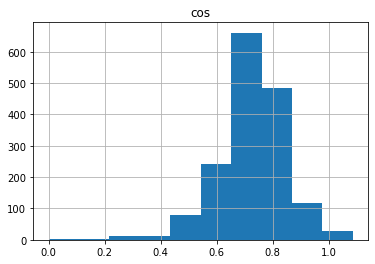

In [187]:
pd.DataFrame({"cos":cos_dist_item_resp}).hist()
print("nr of errors: ", np.sum(np.isnan(cos_dist_item_resp)))
print(" elements with error: %s" % (np.where(np.isnan(cos_dist_item_resp) == True)))

In [188]:
print(dat.iloc[971])
nlp(dat.iloc[971].response).vector

Unnamed: 0.1                  971
Unnamed: 0                    971
id                            972
item                        chair
response              firelighter
response_id              20161284
object                       book
respondent_id          BP20160029
temperature                   NaN
eucl_item_resp           6.875682
eucl_objc_resp           6.498696
cos_dist_item_resp       0.721438
cos_dist_objc_resp       0.807356
Name: 971, dtype: object


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [189]:
cos_dist_item_resp[971] = 1-cos_sim(nlp("fire lighter").vector, nlp("chair").vector) 

In [191]:
cos_dist_objc_resp = [1-cos_sim(nlpSRdocvec(x),nlpSRdocvec(y)) for x,y in zip(nlp.pipe(dat.object.values), nlp.pipe(dat.response.values))]

In [192]:
cos_dist_objc_resp[971] = 1-cos_sim(nlp("fire lighter").vector, nlp("book").vector) 

In [193]:
dat['eucl_item_resp'] = eucl_item_resp
dat['eucl_objc_resp'] = eucl_objc_resp
dat['cos_dist_item_resp'] = cos_dist_item_resp
dat['cos_dist_objc_resp'] = cos_dist_objc_resp

In [194]:
dat

,Unnamed: 0.1,Unnamed: 0,id,item,response,response_id,object,respondent_id,temperature,eucl_item_resp,eucl_objc_resp,cos_dist_item_resp,cos_dist_objc_resp
0,0,0,1,chair,doorstop,2022040001,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,8.658492,8.365611,0.854830,0.847086
1,1,1,2,chair,start a fire,2022040002,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,10.428500,10.068347,0.745140,0.711959
2,2,2,3,chair,prop up a table or chair leg,2022040003,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,14.246610,18.472130,0.224659,0.763021
3,3,3,4,chair,paperweight,2022040004,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,8.695191,8.987339,0.830964,0.939968
4,4,4,5,chair,make art such as by decoupaging it onto a canv...,2022040005,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,11.617539,11.425836,0.672364,0.657401
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1638,1638,1639,chair,rolls,20167316,tin can,BP20160002,NaN,8.034032,7.797247,0.765450,0.738964
1639,1639,1639,1640,chair,money box,20167317,tin can,BP20160002,NaN,9.982292,9.149817,0.694928,0.580835
1640,1640,1640,1641,chair,seat cover,20167318,tin can,BP20160002,NaN,8.773678,11.358750,0.422534,0.784790
1641,1641,1641,1642,chair,reflector on bicycle,20167319,tin can,BP20160002,NaN,11.037926,11.075541,0.729699,0.743495


In [195]:
dat.to_csv("aut_semdis_input_w_dists.csv")

### Compute semantic distances between subsequent responses within respondents

In [196]:
dat = pd.read_csv("aut_semdis_input_w_dists.csv")
dat

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,item,response,response_id,object,respondent_id,temperature,eucl_item_resp,eucl_objc_resp,cos_dist_item_resp,cos_dist_objc_resp
0,0,0,0,1,chair,doorstop,2022040001,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,8.658492,8.365611,0.854830,0.847086
1,1,1,1,2,chair,start a fire,2022040002,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,10.428500,10.068347,0.745140,0.711959
2,2,2,2,3,chair,prop up a table or chair leg,2022040003,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,14.246610,18.472130,0.224659,0.763021
3,3,3,3,4,chair,paperweight,2022040004,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,8.695191,8.987339,0.830964,0.939968
4,4,4,4,5,chair,make art such as by decoupaging it onto a canv...,2022040005,book,cmpl-4zrXKRorn55iQY1NXc3Vq3WKCLtyf,0.67,11.617539,11.425836,0.672364,0.657401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1638,1638,1638,1639,chair,rolls,20167316,tin can,BP20160002,NaN,8.034032,7.797247,0.765450,0.738964
1639,1639,1639,1639,1640,chair,money box,20167317,tin can,BP20160002,NaN,9.982292,9.149817,0.694928,0.580835
1640,1640,1640,1640,1641,chair,seat cover,20167318,tin can,BP20160002,NaN,8.773678,11.358750,0.422534,0.784790
1641,1641,1641,1641,1642,chair,reflector on bicycle,20167319,tin can,BP20160002,NaN,11.037926,11.075541,0.729699,0.743495


In [302]:
from scipy.spatial.distance import cosine
cos_sim = lambda x,y: np.dot(x,y)/np.linalg.norm(x)/np.linalg.norm(y) if np.linalg.norm(x)>0 and np.linalg.norm(y) > 0 else 0
cos_sim = lambda x,y: 1-cosine(x,y) if np.linalg.norm(x)>0 and np.linalg.norm(y) > 0 else 0
def cos_sim(x,y):
    """An attempt to obtain a safer version of the cosine similarity that doesn't produce values larger than 1. It fails misserably"""
    normx = np.linalg.norm(x)
    normy = np.linalg.norm(y)
    if not normx > 0 or not normy > 0:
        return 0
    normxy = np.linalg.norm(x-y)
    return 0.5*(normx/normy + normy/normx - normxy**2/(normx*normy))

cos_sim = lambda x,y: cosine(x,y) if np.linalg.norm(x)>0 and np.linalg.norm(y) > 0 else 0

In [310]:
def nlpSR(string, keep_sw = False):
    """Compute document vector with stopwords removed"""
    doc = nlp(string)
    return sum([w.vector for w in doc if keep_sw or not w.is_stop], doc.vector*0)

def conseq_semdis(df):
    """Compute semantic distances of consequtive responses in df"""
    resp = df.response.values
    if len(resp) > 1:
        csq_semdis = [2]+[1-cos_sim(nlpSR(resp[i+1]),nlpSR(resp[i])) for i in range(len(df)-1)]
    else:
        csq_semdis = [2]
    df['semdis_prev'] = csq_semdis
    return df

dat2 = dat.sort_values(['respondent_id','response_id','object']).groupby('respondent_id').apply(conseq_semdis)
dat2

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,item,response,response_id,object,respondent_id,temperature,eucl_item_resp,eucl_objc_resp,cos_dist_item_resp,cos_dist_objc_resp,semdis_prev
1368,1368,1368,1368,1369,chair,conductor,20172822,fork,BP20160000,NaN,9.479910,9.907753,0.848169,0.934733,2.000000
1369,1369,1369,1369,1370,chair,catapult,20172823,fork,BP20160000,NaN,8.275051,8.265690,0.844249,0.851954,0.015452
1370,1370,1370,1370,1371,chair,keep elastic,20172824,fork,BP20160000,NaN,9.093078,8.941148,0.815741,0.795424,0.120879
1371,1371,1371,1371,1372,chair,bobbin,20172825,fork,BP20160000,NaN,9.251673,9.003500,0.870786,0.832043,0.349067
1372,1372,1372,1372,1373,chair,thumbtack substitute,20172826,fork,BP20160000,NaN,10.181813,10.375311,0.811973,0.850204,0.138895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,815,815,815,816,chair,pig,2022050312,tin can,cmpl-59ySPvIcRvSasC17RrZwg81HyHEQa,0.8,8.385424,7.588443,0.797555,0.668375,0.341392
816,816,816,816,817,chair,could be used as a vase for flowers,2022050313,tin can,cmpl-59ySSFYX1Mhi8Dk5POGScOVs4gYx0,0.8,12.931841,12.249508,0.746773,0.653326,2.000000
817,817,817,817,818,chair,could be used to hold paintbrushes and other p...,2022050314,tin can,cmpl-59ySSFYX1Mhi8Dk5POGScOVs4gYx0,0.8,16.053053,15.903996,0.672178,0.652892,0.452594
818,818,818,818,819,chair,could be used as a desk tidy to hold penspenci...,2022050315,tin can,cmpl-59ySSFYX1Mhi8Dk5POGScOVs4gYx0,0.8,11.202681,13.052698,0.444717,0.691533,0.519806


In [311]:
np.where(dat2.semdis_prev.values > 1)
#1-cosine(nlpSR(tmp.response.values[3]),nlpSR(tmp.object.values[3]))
#tmp[tmp.respondent_id == 'BP20160025']
#1-cosine(nlpSR(tmp.response.values[3]),nlpSR(tmp.object.values[3]))
#tmp.groupby('object').apply(conseq_semdis)
#tmp.iloc[4:6].groupby('object').apply(conseq_semdis)
#1-cos_sim(nlpSR(tmp.iloc[4:6].response.values[0]), nlpSR(tmp.iloc[4:6].response.values[1]))

(array([   0,    9,   21,   53,   68,   73,   90,  113,  132,  167,  195,
         214,  258,  283,  330,  373,  384,  412,  420,  442,  459,  471,
         485,  497,  526,  540,  559,  574,  586,  604,  613,  619,  632,
         654,  662,  687,  721,  744,  761,  769,  790,  813,  823,  828,
         834,  839,  844,  849,  855,  860,  865,  870,  876,  881,  887,
         893,  898,  904,  910,  916,  922,  927,  932,  938,  943,  949,
         955,  961,  965,  970,  975,  980,  985,  990,  995, 1001, 1007,
        1012, 1018, 1023, 1028, 1035, 1040, 1046, 1052, 1058, 1065, 1071,
        1076, 1082, 1088, 1094, 1099, 1104, 1113, 1119, 1125, 1131, 1136,
        1142, 1151, 1154, 1159, 1160, 1165, 1174, 1180, 1185, 1190, 1199,
        1203, 1209, 1215, 1222, 1228, 1237, 1242, 1251, 1254, 1260, 1265,
        1270, 1274, 1280, 1284, 1286, 1291, 1296, 1302, 1308, 1317, 1322,
        1327, 1332, 1337, 1342, 1351, 1356, 1365, 1370, 1375, 1381, 1386,
        1392, 1398, 1404, 1409, 1414, 

<AxesSubplot:>

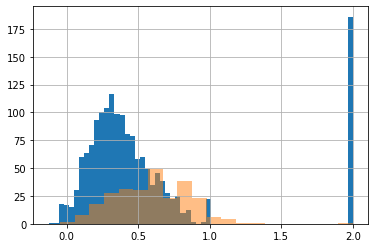

In [312]:
dat2.semdis_prev.hist(bins=60)
dat2.groupby(['respondent_id','object']).mean().semdis_prev.hist(alpha=0.5,bins=20)

In [313]:
!ls

README.md        aut_pilot_ICCC22


In [314]:
dat2.to_csv("aut_semdis_input_w_dists.csv")
!mv *.csv ./aut_pilot_ICCC22/semdis/.

In [315]:
%cd creAI-gpt3

[Errno 2] No such file or directory: 'creAI-gpt3'
/Users/raoul/Documents/PythonEnvironments/Claire GPT-3 creativiteit dingen/creAI-gpt3


In [323]:
!git status

On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   aut_pilot_ICCC22/semdis/semdis_computations_spacy.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	aut_pilot_ICCC22/semdis/.ipynb_checkpoints/

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
#!git rm ./aut_pilot_ICCC22/aut_semdis_input_w_dists.csv
#!git rm ./aut_pilot_ICCC22/semdis_computations_spacy.ipynb
#!git rm ./aut_pilot_ICCC22/semdis_human+gpt3_differences_R.ipynb
!mv *.csv ./aut_pilot_ICCC22/semdis/.
!git add ./aut_pilot_ICCC22/semdis/*
!git status

In [179]:
#!git commit -a -m 'recomputed semantic distances with stop words removed'

[master c5e6cdd] removed old files
 Committer: Raoul Grasman <raoul@Raouls-MacBook-Air-2021.local>
Your name and email address were configured automatically based
on your username and hostname. Please check that they are accurate.
You can suppress this message by setting them explicitly:

    git config --global user.name "Your Name"
    git config --global user.email you@example.com

After doing this, you may fix the identity used for this commit with:

    git commit --amend --reset-author

 6 files changed, 2444 insertions(+), 5010 deletions(-)
 delete mode 100644 aut_pilot_ICCC22/aut_semdis_input_w_dists.csv
 rewrite aut_pilot_ICCC22/semdis/aut_semdis_input_w_dists.csv (96%)
 delete mode 100644 aut_pilot_ICCC22/semdis_computations_spacy.ipynb
 delete mode 100644 aut_pilot_ICCC22/semdis_human+gpt3_differences_R.ipynb


In [181]:
#!git config --global user.email "rgrasman@uva.nl"

In [183]:
#!git commit --amend --reset-author -m 'Removed old files'

[master 0172eaa] Removed old files
 6 files changed, 2444 insertions(+), 5010 deletions(-)
 delete mode 100644 aut_pilot_ICCC22/aut_semdis_input_w_dists.csv
 rewrite aut_pilot_ICCC22/semdis/aut_semdis_input_w_dists.csv (96%)
 delete mode 100644 aut_pilot_ICCC22/semdis_computations_spacy.ipynb
 delete mode 100644 aut_pilot_ICCC22/semdis_human+gpt3_differences_R.ipynb


In [325]:
!git commit -a -m 'analyzed sequential semantic distances'

[master 958fb0d] analyzed sequential semantic distances
 1 file changed, 14 insertions(+), 44 deletions(-)


In [ ]:
!git push

Enumerating objects: 18, done.
Counting objects: 100% (18/18), done.
Delta compression using up to 8 threads
Compressing objects: 100% (12/12), done.
Writing objects: 100% (12/12), 1.56 MiB | 1.15 MiB/s, done.
Total 12 (delta 7), reused 0 (delta 0), pack-reused 0
